In [4]:
import requests
import json
import os 
import quandl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlalchemy as db
import seaborn as sns
%matplotlib inline
from datetime import date
import holidays

In [5]:
#Reading in and cleaning the CSV File 
option_data = pd.read_csv('Put:Call Data.csv')
#sentiment_data = sentiment_data.dropna()
option_data

,Date,CBOE Equity Put/Call,Unnamed: 2,Unnamed: 3
0,4/14/20,0.58,NaN,NaN
1,4/13/20,0.65,NaN,NaN
2,4/9/20,0.65,NaN,NaN
3,4/8/20,0.65,NaN,NaN
4,4/7/20,0.65,NaN,NaN
...,...,...,...,...
5809,1/9/97,0.35,NaN,NaN
5810,1/8/97,0.33,NaN,NaN
5811,NaN,NaN,NaN,NaN
5812,NaN,NaN,NaN,NaN


In [6]:
option_data_df = option_data.drop(columns=['Unnamed: 2', 'Unnamed: 3'])
option_data_df

,Date,CBOE Equity Put/Call
0,4/14/20,0.58
1,4/13/20,0.65
2,4/9/20,0.65
3,4/8/20,0.65
4,4/7/20,0.65
...,...,...
5809,1/9/97,0.35
5810,1/8/97,0.33
5811,NaN,NaN
5812,NaN,NaN


In [7]:
option_data_df =option_data_df.dropna()
option_data_df

,Date,CBOE Equity Put/Call
0,4/14/20,0.58
1,4/13/20,0.65
2,4/9/20,0.65
3,4/8/20,0.65
4,4/7/20,0.65
...,...,...
5806,1/14/97,0.37
5807,1/13/97,0.32
5808,1/10/97,0.34
5809,1/9/97,0.35


In [8]:
option_data_frame = option_data_df.sort_index(ascending=False, axis=0)
option_data_frame

,Date,CBOE Equity Put/Call
5810,1/8/97,0.33
5809,1/9/97,0.35
5808,1/10/97,0.34
5807,1/13/97,0.32
5806,1/14/97,0.37
...,...,...
4,4/7/20,0.65
3,4/8/20,0.65
2,4/9/20,0.65
1,4/13/20,0.65


In [9]:
#5 Year Dataframe
five_year_option = option_data_df.loc[0:1250]
five_year_option

,Date,CBOE Equity Put/Call
0,4/14/20,0.58
1,4/13/20,0.65
2,4/9/20,0.65
3,4/8/20,0.65
4,4/7/20,0.65
...,...,...
1246,4/20/15,0.56
1247,4/17/15,0.74
1248,4/16/15,0.67
1249,4/15/15,0.59


In [10]:
five_year_clean = five_year_option.sort_index(ascending=False, axis=0)
five_year_clean

,Date,CBOE Equity Put/Call
1250,4/14/15,0.66
1249,4/15/15,0.59
1248,4/16/15,0.67
1247,4/17/15,0.74
1246,4/20/15,0.56
...,...,...
4,4/7/20,0.65
3,4/8/20,0.65
2,4/9/20,0.65
1,4/13/20,0.65


In [11]:
five_year_final = five_year_clean.set_index('Date')
five_year_final

,CBOE Equity Put/Call
Date,
4/14/15,0.66
4/15/15,0.59
4/16/15,0.67
4/17/15,0.74
4/20/15,0.56
...,...
4/7/20,0.65
4/8/20,0.65
4/9/20,0.65


In [12]:
five_year_final = five_year_final.dropna()
five_year_final

,CBOE Equity Put/Call
Date,
4/14/15,0.66
4/15/15,0.59
4/16/15,0.67
4/17/15,0.74
4/20/15,0.56
...,...
4/7/20,0.65
4/8/20,0.65
4/9/20,0.65


In [13]:
five_year_merge = five_year_final.reset_index()
five_year_merge

,Date,CBOE Equity Put/Call
0,4/14/15,0.66
1,4/15/15,0.59
2,4/16/15,0.67
3,4/17/15,0.74
4,4/20/15,0.56
...,...,...
1246,4/7/20,0.65
1247,4/8/20,0.65
1248,4/9/20,0.65
1249,4/13/20,0.65


In [14]:
five_year_final.dtypes

CBOE Equity Put/Call    float64
dtype: object

In [15]:
five_year_final['5 Day CBOE Equity Put/Call'] = five_year_final['CBOE Equity Put/Call'].rolling(5).mean()
five_year_final

,CBOE Equity Put/Call,5 Day CBOE Equity Put/Call
Date,,
4/14/15,0.66,NaN
4/15/15,0.59,NaN
4/16/15,0.67,NaN
4/17/15,0.74,NaN
4/20/15,0.56,0.644
...,...,...
4/7/20,0.65,0.770
4/8/20,0.65,0.728
4/9/20,0.65,0.694


In [16]:
five_pc = five_year_final['CBOE Equity Put/Call'].rolling(5).mean()
five_pc

Date
4/14/15      NaN
4/15/15      NaN
4/16/15      NaN
4/17/15      NaN
4/20/15    0.644
           ...  
4/7/20     0.770
4/8/20     0.728
4/9/20     0.694
4/13/20    0.658
4/14/20    0.636
Name: CBOE Equity Put/Call, Length: 1251, dtype: float64

In [17]:
five_df = pd.DataFrame(data=five_pc)
five_df = five_df.dropna()
five_df

,CBOE Equity Put/Call
Date,
4/20/15,0.644
4/21/15,0.640
4/22/15,0.636
4/23/15,0.634
4/24/15,0.606
...,...
4/7/20,0.770
4/8/20,0.728
4/9/20,0.694


In [18]:
#What are the Percentiles
print("5th percentile of Bull/Bear : ", 
       np.percentile(five_df, 5)) 
print("95th percentile of Bull/Bear : ", 
       np.percentile(five_df, 95))

5th percentile of Bull/Bear :  0.5479999999999999
95th percentile of Bull/Bear :  0.7939999999999997


In [19]:
five_fifth_percentile = np.percentile(five_df, 5)
five_ninety_fifth_percentile = np.percentile(five_df, 95)

/Users/PeterRepetto/opt/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  func(*args, **kwargs)


<Figure size 432x288 with 0 Axes>

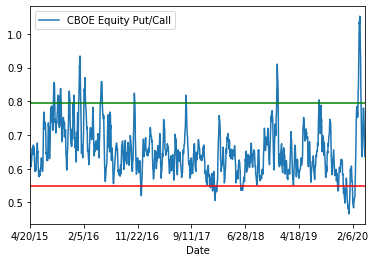

In [20]:
#Plotting the Bull/Bear Ratio 
plt.figure();
five_df.plot()
plt.axhline(five_fifth_percentile, color='R')
plt.axhline(five_ninety_fifth_percentile, color='G')

In [21]:
five_year_final['25 Day Equity Put/Call'] = five_year_final['CBOE Equity Put/Call'].rolling(25).mean()
five_year_final

,CBOE Equity Put/Call,5 Day CBOE Equity Put/Call,25 Day Equity Put/Call
Date,,,
4/14/15,0.66,NaN,NaN
4/15/15,0.59,NaN,NaN
4/16/15,0.67,NaN,NaN
4/17/15,0.74,NaN,NaN
4/20/15,0.56,0.644,NaN
...,...,...,...
4/7/20,0.65,0.770,0.8216
4/8/20,0.65,0.728,0.8220
4/9/20,0.65,0.694,0.8168


In [22]:
twenty_five_pc = five_year_final['CBOE Equity Put/Call'].rolling(25).mean()
twenty_five_pc

Date
4/14/15       NaN
4/15/15       NaN
4/16/15       NaN
4/17/15       NaN
4/20/15       NaN
            ...  
4/7/20     0.8216
4/8/20     0.8220
4/9/20     0.8168
4/13/20    0.8072
4/14/20    0.7856
Name: CBOE Equity Put/Call, Length: 1251, dtype: float64

In [23]:
twenty_five_df = pd.DataFrame(data=twenty_five_pc)
twenty_five_df = twenty_five_df.dropna()
twenty_five_df

,CBOE Equity Put/Call
Date,
5/18/15,0.6356
5/19/15,0.6328
5/20/15,0.6324
5/21/15,0.6340
5/22/15,0.6300
...,...
4/7/20,0.8216
4/8/20,0.8220
4/9/20,0.8168


In [24]:
option_final = option_data_frame.set_index('Date')
option_final

,CBOE Equity Put/Call
Date,
1/8/97,0.33
1/9/97,0.35
1/10/97,0.34
1/13/97,0.32
1/14/97,0.37
...,...
4/7/20,0.65
4/8/20,0.65
4/9/20,0.65


In [25]:
#What are the Percentiles
print("5th percentile of Bull/Bear : ", 
       np.percentile(twenty_five_df, 5)) 
print("95th percentile of Bull/Bear : ", 
       np.percentile(twenty_five_df, 95))

5th percentile of Bull/Bear :  0.5701200000000001
95th percentile of Bull/Bear :  0.7548400000000004


In [26]:
twenty_five_fifth_percentile = np.percentile(twenty_five_df, 5)
twenty_five_ninety_fifth_percentile = np.percentile(twenty_five_df, 95)

<Figure size 432x288 with 0 Axes>

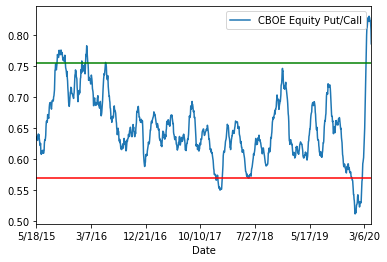

In [27]:
#Plotting the Bull/Bear Ratio 
plt.figure();
twenty_five_df.plot()
plt.axhline(twenty_five_fifth_percentile, color='R')
plt.axhline(twenty_five_ninety_fifth_percentile, color='G')

In [28]:
#What are the Percentiles
print("5th percentile of Bull/Bear : ", 
       np.percentile(five_year_final, 5)) 
print("95th percentile of Bull/Bear : ", 
       np.percentile(five_year_final, 95))

5th percentile of Bull/Bear :  nan
95th percentile of Bull/Bear :  nan


In [29]:
#Setting The Percentile Bands 
fifth_percentile = np.percentile(five_year_final, 5)
ninety_fifth_percentile = np.percentile(five_year_final, 95)

<Figure size 432x288 with 0 Axes>

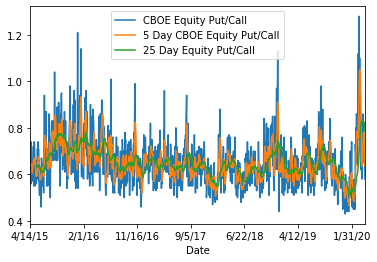

In [30]:
#Plotting the Bull/Bear Ratio 
plt.figure();
five_year_final.plot()
plt.axhline(fifth_percentile, color='R')
plt.axhline(ninety_fifth_percentile, color='G')

In [34]:
#Signals for Option
def option_signal(five_year_final):
    results = []
    for i in five_df:
        if i <= fifth_percentile:
            results.append(-1)
        elif i >= ninety_fifth_percentile:
            results.append(1)
        else: 
            results.append(0)
    
    return results

In [36]:
#signal = option_signal(five_year_final.values)

In [29]:
signal_df = pd.DataFrame(data=signal)
signal_df

,0
0,0
1,0
2,0
3,0
4,0
...,...
1246,0
1247,0
1248,0
1249,0


In [30]:
#Setting the Signal 
option_signal_df = pd.concat([five_year_clean['Date'], signal_df], axis='columns', join='inner')
option_signal_df.index = five_year_clean['Date']
option_signal_df = option_signal_df.iloc[:, 1:]
option_signal_df.head()

,0
Date,
4/14/15,0
4/15/15,0
4/16/15,0
4/17/15,0
4/20/15,0


In [31]:
#Setting the New Dataframe
option_signal = option_signal_df.rename(columns = {0: 'CBOE Equity Put/Call'})
option_signal.tail()

,CBOE Equity Put/Call
Date,
4/7/20,0
4/8/20,0
4/9/20,0
4/13/20,0
4/14/20,0


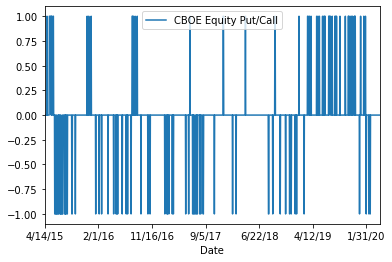

In [32]:
option_signal.plot()

In [33]:
#Signals for Option
def option_signal(five_df):
    results = []
    for i in five_df:
        if i <= five_fifth_percentile:
            results.append(-1)
        elif i >= five_ninety_fifth_percentile:
            results.append(1)
        else: 
            results.append(0)
    
    return results

In [34]:
five_signal = option_signal(five_df.values)

In [35]:
five_signal_df = pd.DataFrame(data=signal)
five_signal_df

,0
0,0
1,0
2,0
3,0
4,0
...,...
1246,0
1247,0
1248,0
1249,0


In [36]:
#Setting the Signal 
five_option_signal_df = pd.concat([five_year_clean['Date'], five_signal_df], axis='columns', join='inner')
five_option_signal_df.index = five_year_clean['Date']
five_option_signal_df = five_option_signal_df.iloc[:, 1:]
five_option_signal_df.head()

,0
Date,
4/14/15,0
4/15/15,0
4/16/15,0
4/17/15,0
4/20/15,0


In [37]:
#Setting the New Dataframe
five_day_pc = five_option_signal_df.rename(columns = {0: 'CBOE 5 Day Equity Put/Call'})
five_day_pc.tail()

,CBOE 5 Day Equity Put/Call
Date,
4/7/20,0
4/8/20,0
4/9/20,0
4/13/20,0
4/14/20,0


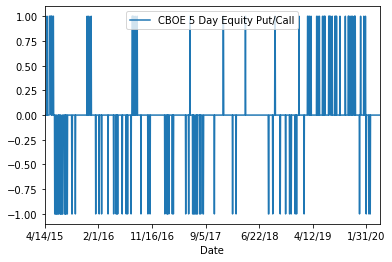

In [38]:
five_day_pc.plot()

In [39]:
#Signals for Option
def option_signal(twenty_five_df):
    results = []
    for i in twenty_five_df:
        if i <= twenty_five_fifth_percentile:
            results.append(-1)
        elif i >= twenty_five_ninety_fifth_percentile:
            results.append(1)
        else: 
            results.append(0)
    
    return results

In [40]:
twenty_five_signal = option_signal(twenty_five_df.values)

In [41]:
twenty_five_signal_df = pd.DataFrame(data=twenty_five_signal)
twenty_five_signal_df

,0
0,0
1,0
2,0
3,0
4,0
...,...
1222,1
1223,1
1224,1
1225,1


In [42]:
twenty_five_option_signal = pd.merge(five_year_merge,twenty_five_signal_df,left_index=True, right_index=True, how = 'left')
twenty_five_option_signal.fillna(method = 'ffill', inplace = True)
twenty_five_option_signal.dropna(inplace=True)
twenty_five_option_signal

,Date,CBOE Equity Put/Call,0
0,4/14/15,0.66,0.0
1,4/15/15,0.59,0.0
2,4/16/15,0.67,0.0
3,4/17/15,0.74,0.0
4,4/20/15,0.56,0.0
...,...,...,...
1246,4/7/20,0.65,1.0
1247,4/8/20,0.65,1.0
1248,4/9/20,0.65,1.0
1249,4/13/20,0.65,1.0


In [43]:
#Setting the New Dataframe
twenty_five_day_pc = twenty_five_option_signal.rename(columns = {0: 'CBOE 25 Day Equity Put/Call'})
twenty_five_day_pc.tail()

,Date,CBOE Equity Put/Call,CBOE 25 Day Equity Put/Call
1246,4/7/20,0.65,1.0
1247,4/8/20,0.65,1.0
1248,4/9/20,0.65,1.0
1249,4/13/20,0.65,1.0
1250,4/14/20,0.58,1.0


In [52]:
twenty_five_day_pc = twenty_five_day_pc.drop(columns=['CBOE Equity Put/Call'])
twenty_five_day_pc

,Date,CBOE 25 Day Equity Put/Call
0,4/14/15,0.0
1,4/15/15,0.0
2,4/16/15,0.0
3,4/17/15,0.0
4,4/20/15,0.0
...,...,...
1246,4/7/20,1.0
1247,4/8/20,1.0
1248,4/9/20,1.0
1249,4/13/20,1.0


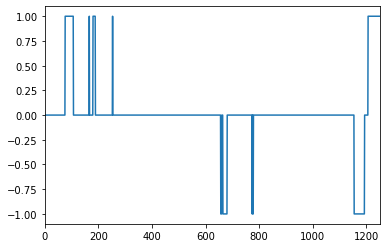

In [44]:
twenty_five_day_pc['CBOE 25 Day Equity Put/Call'].plot()

In [1]:
five_year_final['25 Day Signal'] = option_signal(twenty_five_df.values)
five_year_final

NameError: name 'option_signal' is not defined